In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math


k = 10**8
corr = []
n_d = 100
n_p = 1000
DMAX = 10*10**-4
distances = np.linspace(0,DMAX,n_d)
SourceY = 100
SourceA = [0, SourceY]
SourceB = [0, -SourceY]
L = 10**6
Theta = (2*SourceY)/L
A_D = (SourceA[0]-L)**2
B_D = (SourceB[0]-L)**2
Theory = []

for d in distances:
    Detector1Y = d/2.0
    Detector2Y = -d/2.0
    DistA1 = np.sqrt(A_D+(SourceA[1]-Detector1Y)**2) 
    DistA2 = np.sqrt(A_D+(SourceA[1]-Detector2Y)**2) 
    DistB1 = np.sqrt(B_D+(SourceB[1]-Detector1Y)**2) 
    DistB2 = np.sqrt(B_D+(SourceB[1]-Detector2Y)**2) 
    sumi1i2= sumi1= sumi2 = 0
    
    Dist = DistA1 - DistA2 - DistB1 + DistB2
    Theory.append(1 + .5*np.cos(k*Dist))
    
    for phase in np.random.uniform(0,2*np.pi,n_p):
        AmpA1 = 1j*np.sin(k*DistA1)+np.cos(k*DistA1)
        AmpA2 = 1j*np.sin(k*DistA2)+np.cos(k*DistA2)
        AmpB1 = 1j*np.sin(k*DistB1 + phase)+np.cos(k*DistB1 + phase)
        AmpB2 = 1j*np.sin(k*DistB2 + phase)+np.cos(k*DistB2 + phase)
        i_1 = np.real(np.conj(AmpA1+AmpB1)*(AmpA1+AmpB1))
        i_2 = np.real(np.conj(AmpA2+AmpB2)*(AmpA2+AmpB2))
        sumi1i2 += i_1*i_2
        sumi1 += i_1
        sumi2 += i_2
    corr.append((sumi1i2/(sumi1*sumi2))*n_p)

In [2]:
print(DistA1, DistA2, DistB1, DistB2)
print(Dist)

1000000.00499995 1000000.00500005 1000000.00500005 1000000.00499995
-2.00001522898674e-07


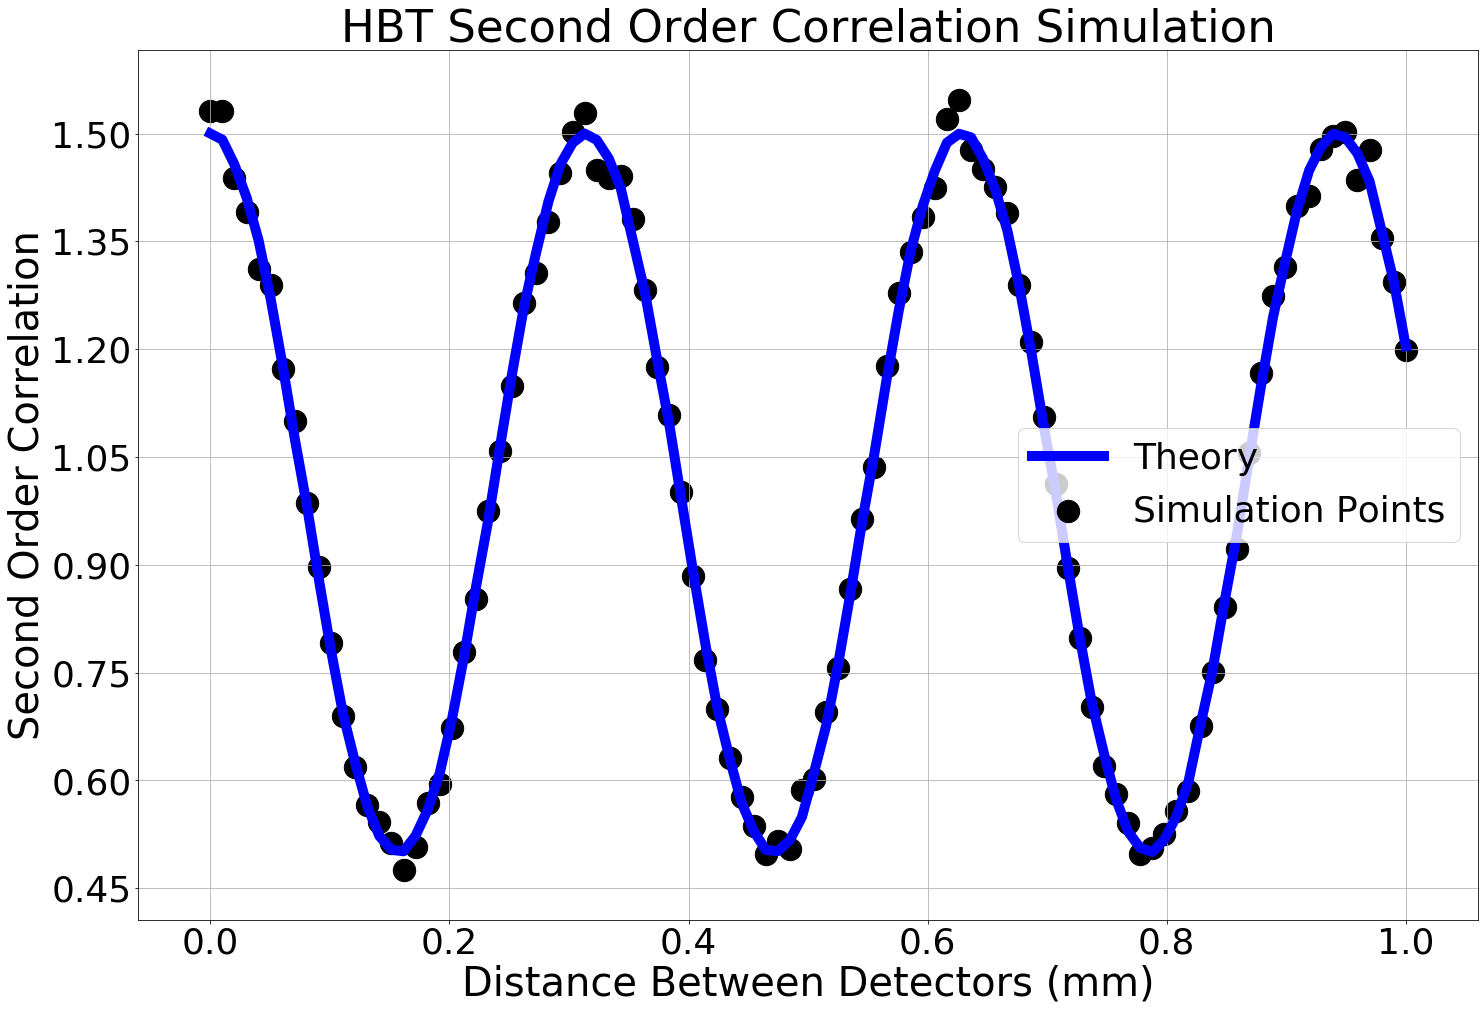

In [3]:
from matplotlib.ticker import MultipleLocator

fig, ax = plt.subplots()
ax.yaxis.set_major_locator(plt.MaxNLocator(12))
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
fig.set_figheight(16)
fig.set_figwidth(24)
plt.title('HBT Second Order Correlation Simulation', fontsize=45)
plt.xlabel("Distance Between Detectors (mm)", fontsize=40)
plt.ylabel("Second Order Correlation", fontsize=40)
plt.xticks(fontsize= 36)
plt.yticks(fontsize= 36)
#plt.plot(distances*10**3, corr, linewidth=10, ls = "dotted", Label = "Simulation")
plt.plot(distances*10**3, Theory, linewidth=10, c = 'blue', Label = "Theory")
plt.scatter(distances*10**3, corr, c = 'black', s = 500,  label = "Simulation Points")
ax.legend(fontsize = 36)
plt.grid()
plt.show()